<a href="https://colab.research.google.com/github/AbhishekTyagi21/Capstone-Project-on-EDA-using-Python/blob/main/Abhishek_Tyagi_%7C_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#accessing/reading the dataset related to hotel booking
filepath='/content/drive/MyDrive/Hotel Bookings.csv'
hoteldf1=pd.read_csv(filepath)
hoteldf1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [10]:
#getting a look into the dataset by obtaining it's summary
hoteldf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

After loading the dataset we can see a number of things. These 32 columns provide a very rich amount of information for deep data exploration we can do on this dataset. We can also see some missing values, which will require cleaning and handling of NaN values.

# Description of Columns

1.hotel : Has 2 values (Resort Hotel or City Hotel)

2.is_canceled : Has 2 values namely 0 meaning booking was canceled and 1 meaning booking was not canceled

3.lead_time : The number of days between the time a guest books their room and the time they are scheduled to arrive at the hotel.

4.arrival_date_year : Year of arrival date

5.arrival_date_month : Month of arrival date

6.arrival_date_week_number : Week number of year on which the customer arrived

7.arrival_date_day_of_month : Date of the month on which the customer arrived

8.stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

9.stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

10.adults : Number of adults

11.children : Number of children

12.babies : Number of babies

13.meal : Type of meal booked by the customer. SC means self-catering (no meals are included). BB means bed and breakfast. HB means half board, in which breakfast and dinner are included. FB means full board, in which breakfast, lunch and dinner are included

14.country : customer's country.

15.market_segment : Market segment designation. In column, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

16.distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

17.is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)

18.previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

19.previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

20.reserved_room_type : Room reserved by the customer.

21.assigned_room_type : Room assigned to the customer.

22.booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered, until the moment of check-in or cancellation

23.deposit_type : Indicating if the customer made a deposit to guarantee the booking.

24.agent : ID of the travel agent or agency that made the booking

25.company : ID of the company/entity that made the booking or responsible for paying the booking.

26.days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer

27.customer_type : Type of customer, “Transient guest” means a person who occupies a room in a hotel, motel or tourist court for less than thirty (30) consecutive days.

28.adr : Average Daily Rate paid or supposed to be paid by the customer

29.required_car_parking_spaces : Number of car parking spaces required by the customer

30.total_of_special_requests :Number of special requests made by the customer (e.g. twin bed or high floor)

31.reservation_status : Shows Reservation status of the customer, assuming one of three categories:

Canceled – booking was canceled by the customer

Check-Out – customer has checked out

No-Show – customer did not check-in and did inform the hotel of the reason why

32.reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the Reservation_status to understand when was the booking canceled or when did the customer checked-out of the hotel

# Understanding, Wrangling and Cleaning Data

Presenting the code and methods for acquiring the data. Loading the data into appropriate format for analysis.Side by side, explaining the process and results.

After looking at the dataset we were able to notice some NaN values, therefore we need to examine missing values before continuing with analysis further.

In [11]:
#finding out first which columns have null values
#using 'sum' function will show us how many nulls are found in each column of the dataset
hoteldf1.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In this dataset, there are not too many columns with null(NaN) values, as we can see that children column has only 4 null values which we can replace with 0 because it's quite natural that those people didn't bring any child with them. And we can also see that country, agent and company have null values but these columns can not be dropped as we need these columns for our analysis. Instead, the null countries can be replaced with a string 'unknown'.

In [12]:
#replacing the null values in children column with 0
hoteldf1["children"].fillna(0,inplace=True)

In [13]:
#replacing null countries with 'unknown'
hoteldf1['country'].fillna('unknown',inplace=True)

In [14]:
#checking again for null values
hoteldf1.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Agent and Company column will be dealt with later on.

There is a column on 1st index whose name is is_canceled which has only 2 values 0 meaning the booking is not cancelled and 1 meaning the booking is cancelled.

In [24]:
#checking how many bookings are cancelled and how many are not cancelled
cancel_or_not=hoteldf1['is_canceled'].value_counts()
cancel_or_not

0    75166
1    44224
Name: is_canceled, dtype: int64

As we can see that 44224 bookings are cancelled, so we will not be using these 44224 rows for our analysis. Only not cancelled rows will be used for analysis.

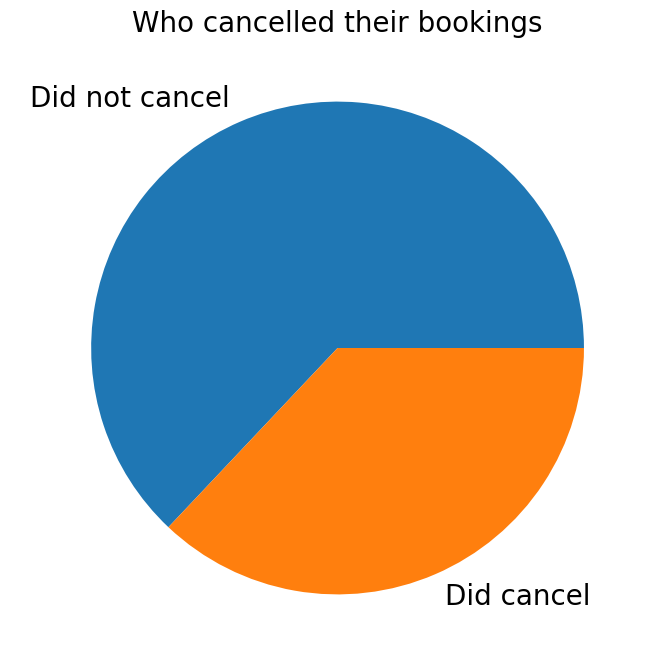

In [28]:
#showing cancelled and not cancelled bookings through a piechart
cancel_or_not.rename({0:'Did not cancel',1:'Did cancel'}).plot.pie(figsize=(10,8),fontsize=20)
plt.title('Who cancelled their bookings',fontsize=20)
plt.ylabel(" ")
plt.show()

In [19]:
#viewing the values in adults columns and its values
hoteldf1['adults'].value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [20]:
#checking the rows where adults are 0
hoteldf1[hoteldf1['adults']==0][['adults','children','babies']]

,adults,children,babies
2224,0,0.0,0
2409,0,0.0,0
3181,0,0.0,0
3684,0,0.0,0
3708,0,0.0,0
...,...,...,...
117204,0,2.0,0
117274,0,2.0,0
117303,0,2.0,0
117453,0,2.0,0


As we can see in some rows adults and childrens are 0. This doesn't make any sense as the dataset we have above has each customer as a row, so these rows with 0 adults and 0 children must be dropped.

In [29]:
#creating a new column to store total members
hoteldf1['total_members']=hoteldf1['adults'] + hoteldf1['children']

Not including babies as babies are not counted as a member whether it is hotels,theatre etc.

As our data cleaning comes to an end we will only be working on those rows where bookings are not cancelled and country is not unknown and total members are not equal to 0.

In [30]:
#obtaining a new dataframe which has cleaned data
hoteldf=hoteldf1[(hoteldf1['is_canceled']==0) & (hoteldf1['country'] != 'unknown') & (hoteldf1['total_members']!=0)]

In [31]:
#checking the dataframe before starting analysis
hoteldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74590 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           74590 non-null  object 
 1   is_canceled                     74590 non-null  int64  
 2   lead_time                       74590 non-null  int64  
 3   arrival_date_year               74590 non-null  int64  
 4   arrival_date_month              74590 non-null  object 
 5   arrival_date_week_number        74590 non-null  int64  
 6   arrival_date_day_of_month       74590 non-null  int64  
 7   stays_in_weekend_nights         74590 non-null  int64  
 8   stays_in_week_nights            74590 non-null  int64  
 9   adults                          74590 non-null  int64  
 10  children                        74590 non-null  float64
 11  babies                          74590 non-null  int64  
 12  meal                           

In [32]:
#viewing first 5 rows of the dataset on which we will be performing EDA
hoteldf.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_members
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0


In [33]:
#viewing last 5 rows of the dataset on which we will be performing EDA
hoteldf.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_members
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07,2.0


The data is now cleaned and we can start with our analysis.

# ***What is the best time of year to book a hotel room ?***

**This question has two aspects-**

i) From customer's point of view:

From customers point of view the best time to book a hotel room is when it is the cheapest i.e during off seasons, when not too many people book hotel rooms.

ii)From hotel's point of view:

From hotel's point of view the best time to book the hotel is during onn seasons i.e when too many people are booking rooms and the demand for rooms is high, at that time the hotel can charge high prices from customers, beacause the supply is same but the demand is relatively high.

In [35]:
#making a new column for month number
def month_number(month):
  if month=='January':
    return 1
  elif month=='February':
    return 2
  elif month=='March':
    return 3
  elif month=='April':
    return 4
  elif month=='May':
    return 5
  elif month=='June':
    return 6
  elif month=='July':
    return 7
  elif month=='August':
    return 8
  elif month=='September':
    return 9
  elif month=='October':
    return 10
  elif month=='November':
    return 11
  else:
    return 12
hoteldf['month_number']=hoteldf['arrival_date_month'].apply(month_number)

<ipython-input-35-76d48da3ad69>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hoteldf['month_number']=hoteldf['arrival_date_month'].apply(month_number)


In [42]:
#getting per month hotel bookings for each year
per_month_booking_for_each_year=hoteldf.groupby('arrival_date_year')['month_number'].value_counts().unstack()
per_month_booking_for_each_year.fillna(0)

month_number,1,2,3,4,5,6,7,8,9,10,11,12
arrival_date_year,,,,,,,,,,,,
2015,0.0,0.0,0.0,0.0,0.0,0.0,1502.0,2273.0,3002.0,3197.0,1831.0,1920.0
2016,1658.0,2516.0,3307.0,3343.0,3548.0,3183.0,3052.0,3222.0,3358.0,3657.0,2780.0,2427.0
2017,2403.0,2788.0,3259.0,3185.0,3543.0,3201.0,3326.0,3109.0,0.0,0.0,0.0,0.0


In [44]:
#storing the 2015 bookings in 2015's dataset
bookings_in2015=per_month_booking_for_each_year.iloc[0]
bookings_in2015

month_number
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7     1502.0
8     2273.0
9     3002.0
10    3197.0
11    1831.0
12    1920.0
Name: 2015, dtype: float64

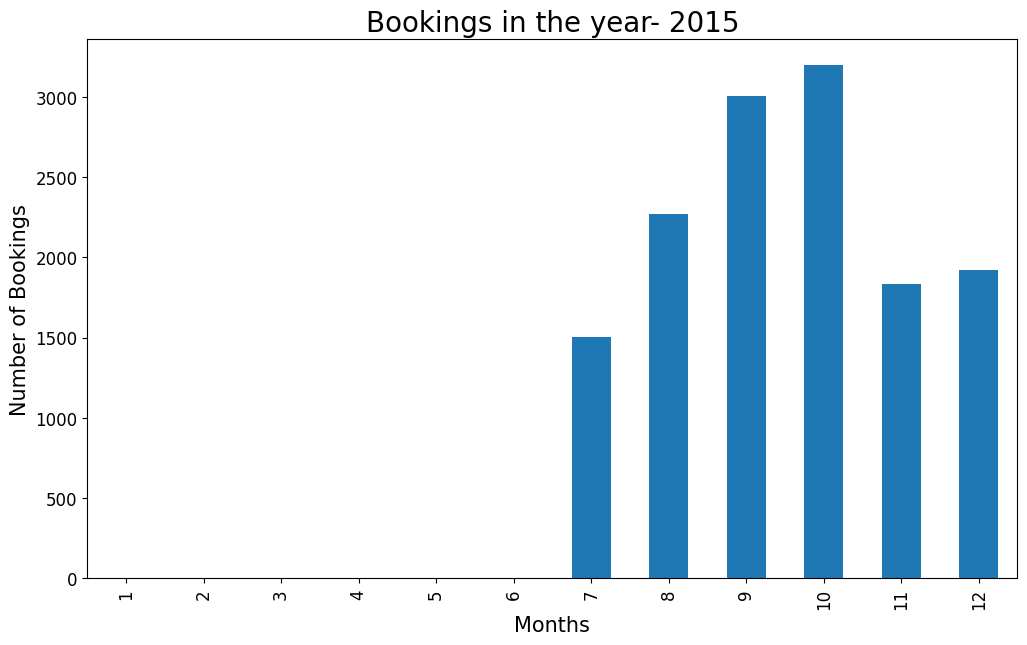

In [45]:
#plotting 2015's dataset on a bar graph
plt.figure(figsize=(12,7))
bookings_in2015.plot(kind='bar',fontsize=12)
plt.title('Bookings in the year- 2015',fontsize=20)
plt.xlabel('Months',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
plt.show()


**Trends in 2015-**

As we can see in 2015 there are no bookings before July i.e 7th month. So,

i)From customer's point of view:

The best time to book hotel room in 2015 is before July because the rates for rooms before July will be very low compared to rates for rooms after July as the demand for rooms before july is zero or very low, and we all know that demand and price are directly proportional to each other.

ii)From hotel's point of view:

The best time to book hotel room in 2015 is after July because the rates for rooms before July will be very low compared to rates for rooms after July as the demand for rooms before July is zero or very low.Hence, hotels can charge hight prices from customers during the period when demand for rooms is high i.e after July.

In [46]:
#storing the 2016's bookings in 2016's dataset
bookings_in2016=per_month_booking_for_each_year.iloc[1]
bookings_in2016

month_number
1     1658.0
2     2516.0
3     3307.0
4     3343.0
5     3548.0
6     3183.0
7     3052.0
8     3222.0
9     3358.0
10    3657.0
11    2780.0
12    2427.0
Name: 2016, dtype: float64

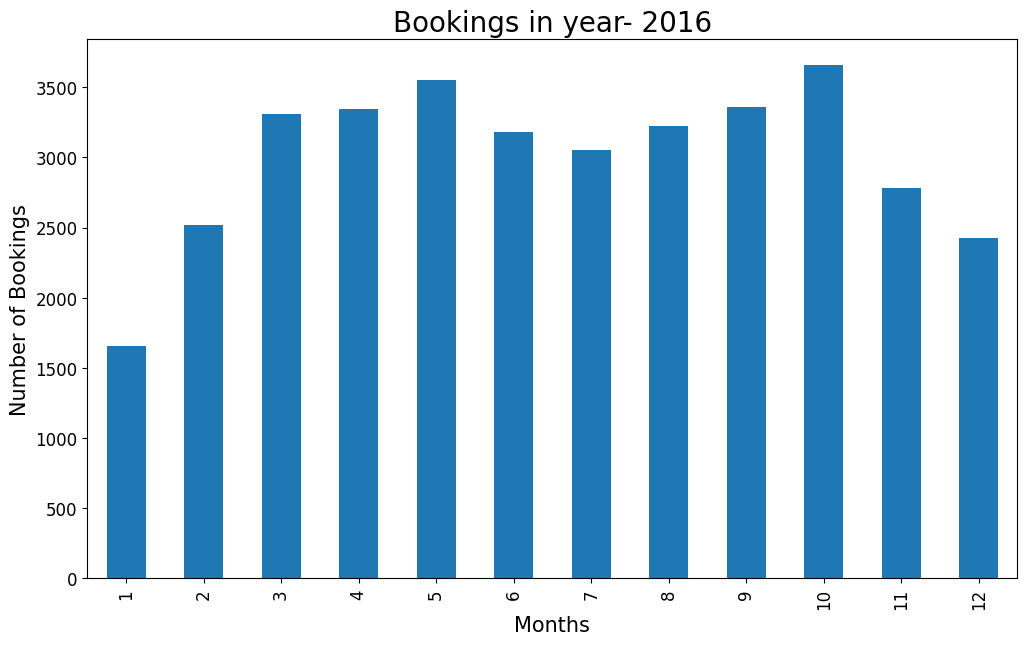

In [47]:
#plotting 2016's dataset on a bar graph
plt.figure(figsize=(12,7))
bookings_in2016.plot(kind='bar',fontsize=12)
plt.title('Bookings in year- 2016',fontsize=20)
plt.xlabel('Months',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
plt.show()


**Trends in 2016-**

As we can see in 2016 there are bookings in every month. So,

i)From customer's point of view:

The best time to book hotel room in 2016 is during 1st two and last 2 months of the year because these months have the least number of bookings throughout the year. Hence, the price for rooms during these months will be less compared to other months.

ii)From hotel's point of view:

The best time to book hotel room in 2016 is during 3rd-10th month of the year because these months have the good amount of bookings. Hence, the hotel can charge relatively high price from customers during these months.

In [48]:
#storing the 2017's bookings in 2017's dataset
bookings_in2017=per_month_booking_for_each_year.iloc[2]
bookings_in2017

month_number
1     2403.0
2     2788.0
3     3259.0
4     3185.0
5     3543.0
6     3201.0
7     3326.0
8     3109.0
9        NaN
10       NaN
11       NaN
12       NaN
Name: 2017, dtype: float64

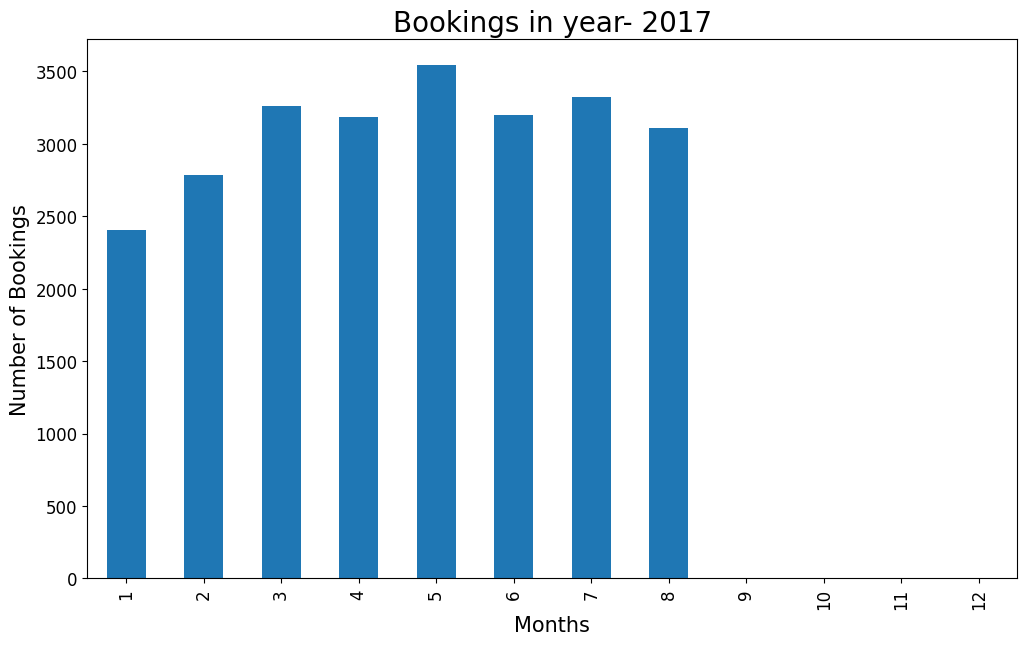

In [49]:
#plotting 2017's dataset on a bar graph
plt.figure(figsize=(12,7))
bookings_in2017.plot(kind='bar',fontsize=12)
plt.title('Bookings in year- 2017',fontsize=20)
plt.xlabel('Months',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
plt.show()


**Trends in 2017-**

As we can see in 2017 there are no/less bookings after 8th month i.e August. So,

i)From customer's point of view:

The best time to book hotel room in 2017 is after August because there is not a single booking trafic after August compare to rest of the months of year 2017, which ultimately will give customer high probability to get discounted rates on hotel rooms.

ii)From hotel's point of view:

The best time to book hotel room in 2017 is till Month of August because till August, graph is denoting high amount of customer engagement which will enable the hotel to charge relatively high price from customers during this period.

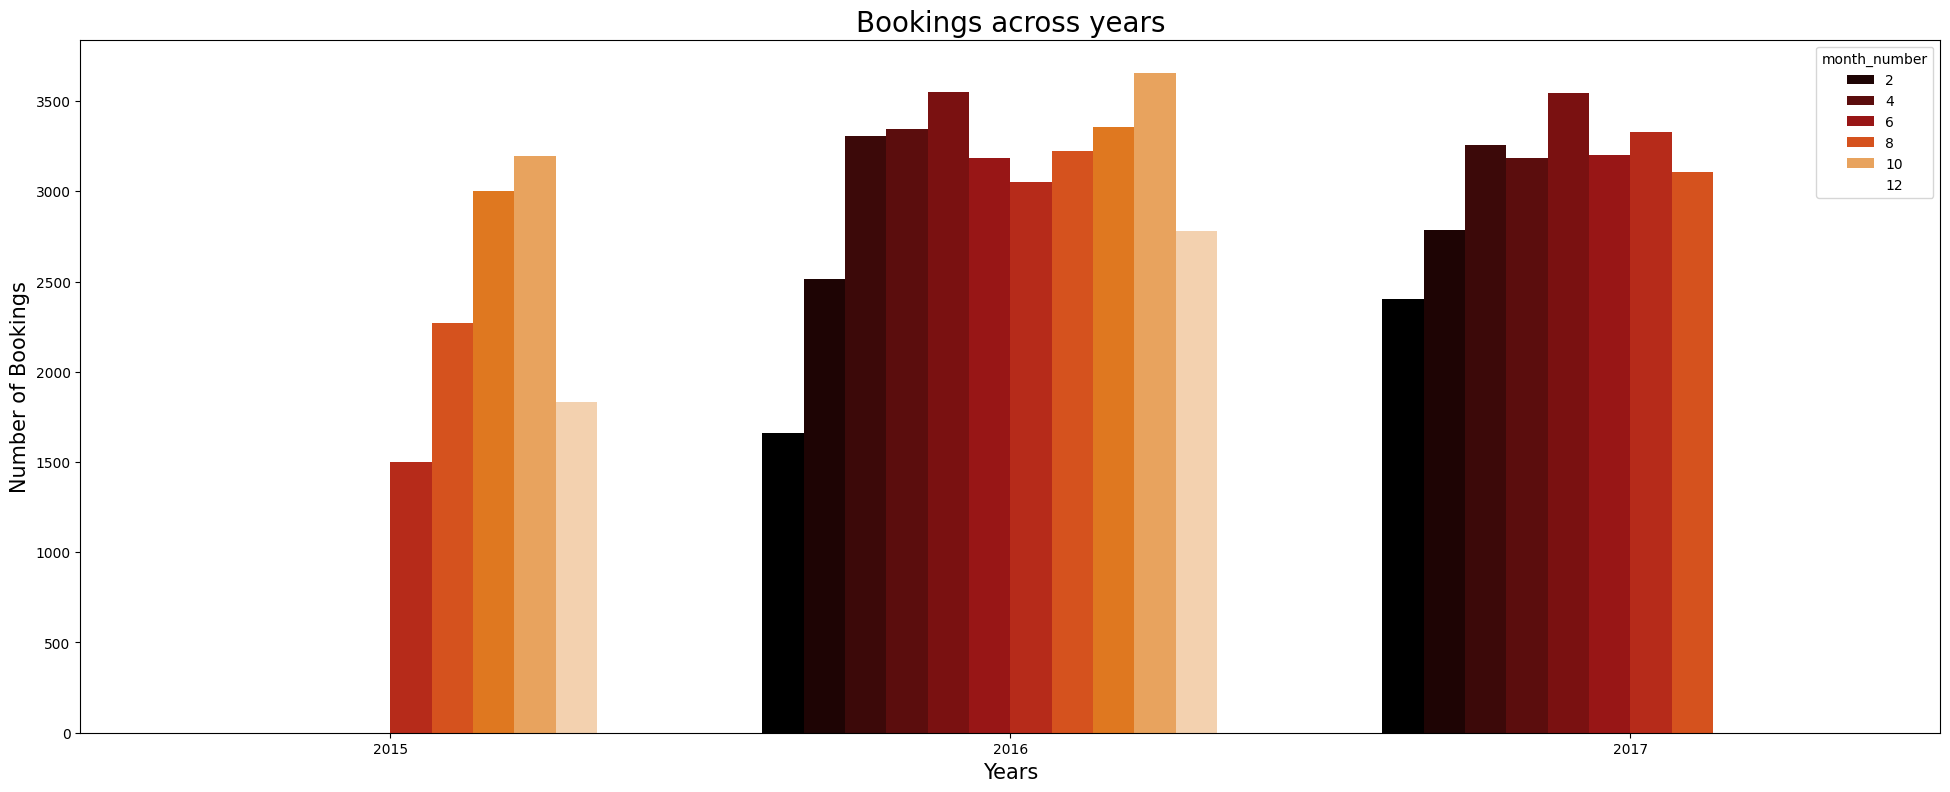

In [52]:
#plotting number of bookings across years
plt.figure(figsize=(24,9))
sns.countplot(x='arrival_date_year',data=hoteldf,hue='month_number',palette='gist_heat')
plt.title('Bookings across years',fontsize=20)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
plt.show()

Most number of bookings were in the year 2016. And the busiest month for the last 2 years was 5th month i.e May.

# ***What is the optimal length of stay in order to get the best daily rate?***


In order to determine the length of stay for getting the best daily rate i.e lowest adr(average daily rate). We need to compare the total nights stayed and adr(average daily rate) with each other.

In [53]:
#calculating the total nights stayed by each customer
hoteldf['nights_stayed']= hoteldf['stays_in_weekend_nights'] + hoteldf['stays_in_week_nights']

<ipython-input-53-9e4455c1482e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hoteldf['nights_stayed']= hoteldf['stays_in_weekend_nights'] + hoteldf['stays_in_week_nights']


<ipython-input-57-1d701b6351c1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0.01)` for the same effect.

  sns.barplot(x='nights_stayed',y='adr',data=hoteldf,ci=0.01,palette='magma')
<ipython-input-57-1d701b6351c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nights_stayed',y='adr',data=hoteldf,ci=0.01,palette='magma')


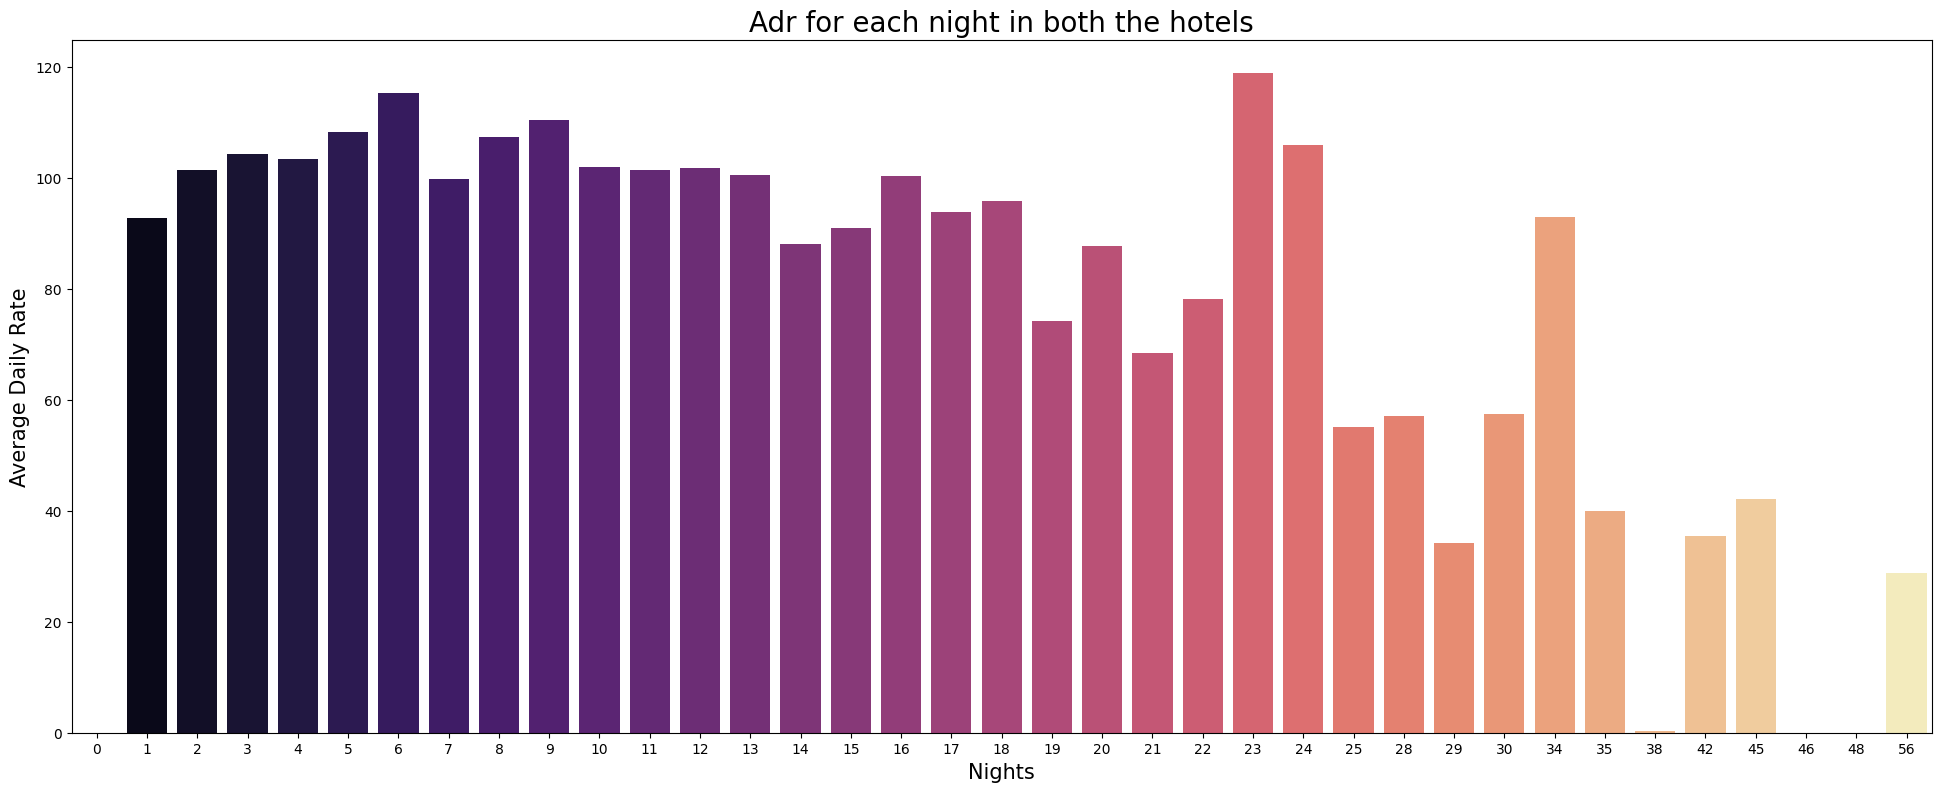

In [57]:
#comparing adr and nights stayed in order to get optimal length of stay
plt.figure(figsize=(24,9))
sns.barplot(x='nights_stayed',y='adr',data=hoteldf,ci=0.01,palette='magma')
plt.title('Adr for each night in both the hotels',fontsize=20)
plt.ylabel('Average Daily Rate',fontsize=15)
plt.xlabel('Nights',fontsize=15)
plt.show()

**Observation:**

For determining the optimal length of stay in order to get the best daily rate one should stay for 1 night or should have a plan to stay for a couple of nights. Because as per the above graph, if a customer stays for 7 nights he'll get a low daily rate. Also, we can say that the maximum night stays are directly proportional to the best daily rate (i.e. at a low price). You can see if the customer stayed for 15 nights, he/she will get the best daily rate compared to 7 nights. In the same manner, if the customer lasted for the 25th night he/she will get a better daily rate than the aforementioned night's duration.

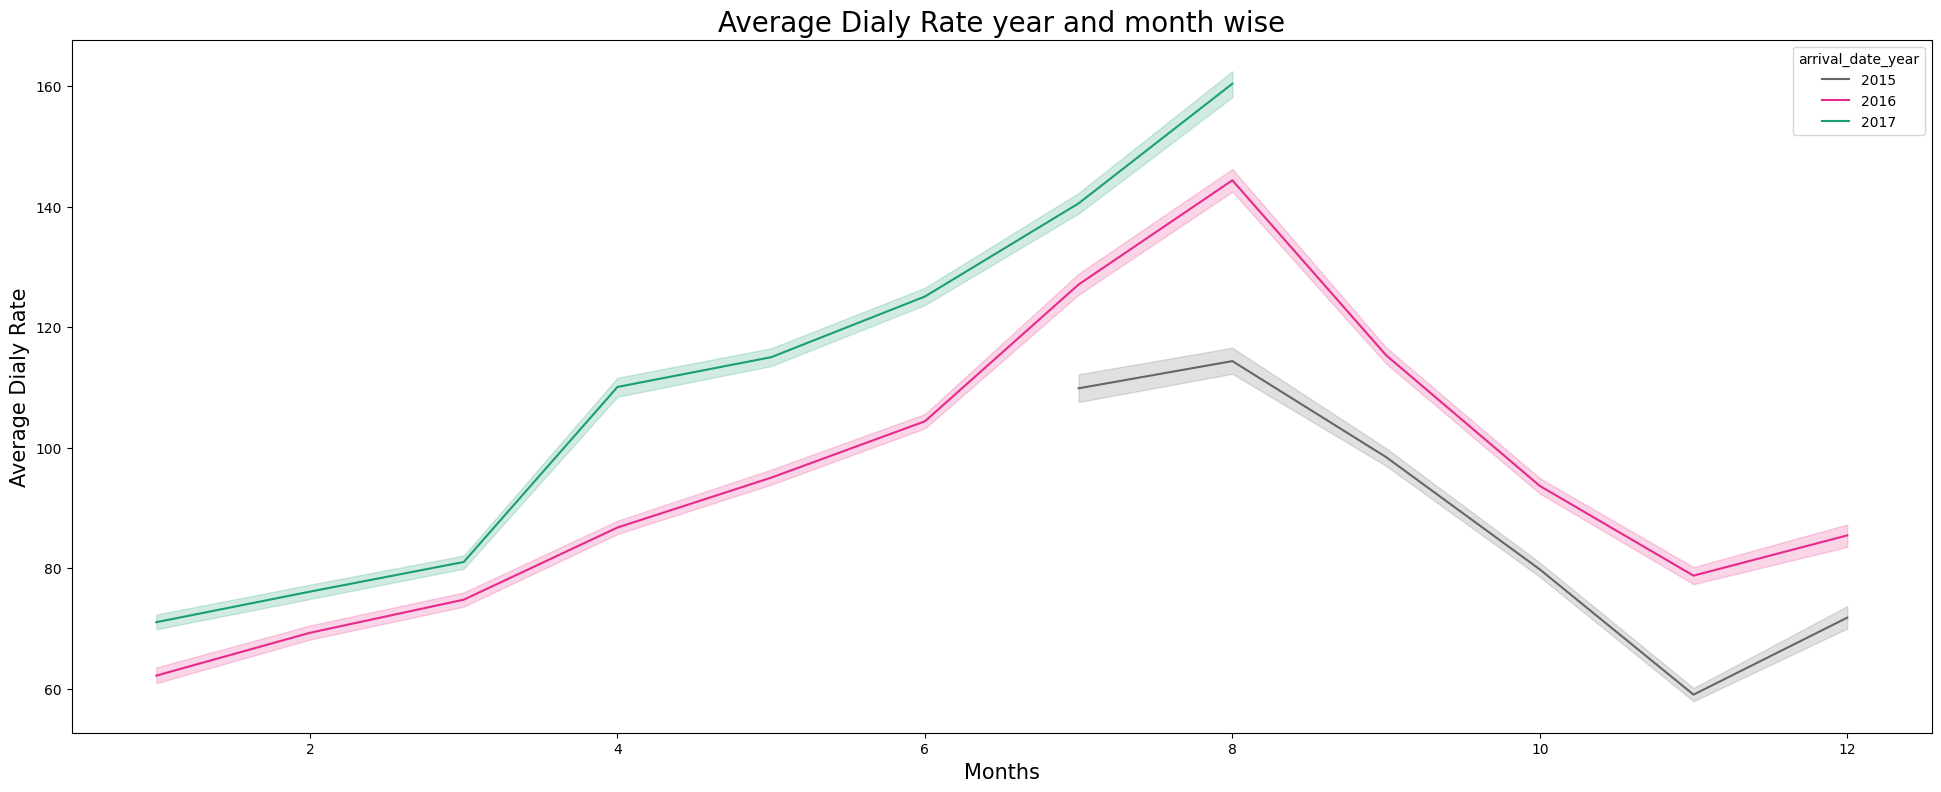

In [58]:
#Per day earning for each month and and year
plt.figure(figsize=(24,9))
sns.lineplot(x='month_number',y='adr',data=hoteldf,hue='arrival_date_year',palette='Dark2_r')
plt.xlabel('Months',fontsize=15)
plt.ylabel('Average Dialy Rate',fontsize=15)
plt.title('Average Dialy Rate year and month wise',fontsize=20)
plt.show()

**Observation:**

As we already know that in the year 2015 and 2017 booking traffic was not present for the complete year, despite this fact the per day earnings for hotel was maximum in the year 2017. The hotels are on the right track mentioning the fact that in 2016 per day earning was more than previous year and in 2017 the hotels have shown a massive per day revenue despite the fact that in 2017 bookings were only made for some months. And Lowest adr is in the month of november in the year 2015.